# A Brief Note on Monte Carlo Integration

C. Schiff - 8/23/20201

The aim of this note is to demontrate the basic functionality of Monte Carlo integration.  

Suppose we have an integral $$I = \int_{x_{min}}^{x_{max}} dx f(x)$$

An adequate approximation to this integral is

$$ I \approx \frac{x_{max} - x_{min}}{N} \sum_{i} f(x_i) $$

where the $x_i$ are chosen randomly within the interval $[x_{min},x_{max}]$ and $N$ is the number of trials.  (see:  https://math.stackexchange.com/questions/2217922/understanding-monte-carlo-and-importance-sampling). 

Let's see this in action for a couple examples.

Usual import stuff

In [1]:
import numpy  as np
import pandas as pd
import scipy  as sp

import matplotlib.pyplot as plt
import scipy.integrate   as integrate

Define a typical polynomial such as$$3.4 x^3 - 5.9 x^2 + 0.3 x - 15.2$$.

In [2]:
def f(x):
    return 3.4*x**3 - 5.9*x**2 + 0.3*x - 15.2

The anti-derivative of this hideous polynomial is 

$$ \frac{3.4}{4} x^4 - \frac{5.9}{3} x^3 + \frac{0.3}{2} x^2 - 15.2 x$$

In [3]:
def F(x):
    return (3.4/4)*x**4 - (5.9/3)*x**3 + (0.3/2)*x**2 - 15.2*x

In [4]:
x_min = -2
x_max = 3.5
dx    = 0.1
x = np.linspace(x_min,x_max,100)
y = f(x)

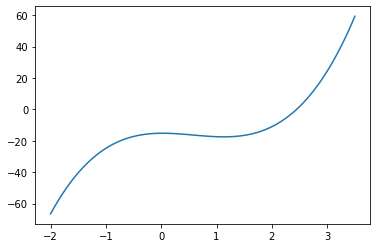

In [5]:
plt.plot(x,y)

In [6]:
rand_x = x_min + (x_max - x_min)*np.random.random(size=100000)
rand_y = f(rand_x)

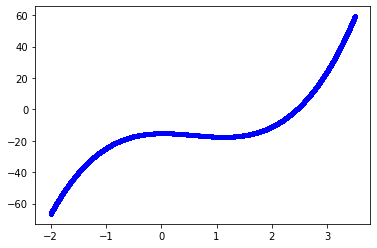

In [7]:
plt.plot(rand_x,rand_y,'b.')

In [8]:
np.average(rand_y)

-12.425985804793957

In [9]:
I_poly_est  = (x_max - x_min)*np.average(rand_y)

In [10]:
I_poly_true = F(x_max)-F(x_min)

In [11]:
print('true: ',I_poly_true,'\t','estimate: ',I_poly_est)

true:  -68.46354166666669 	 estimate:  -68.34292192636676


Now define a fairly nasty function $$ 4 \sin \left( 2 \pi e^{\cos x^2} \right) $$

In [12]:
def f_nasty(x):
    return 4*np.sin(2*np.pi*np.exp(np.cos(np.power(x,2))))

In [13]:
x_min = -2
x_max = 3.5
x_nasty = np.linspace(x_min,x_max,1000)
y_nasty = f_nasty(x_nasty)

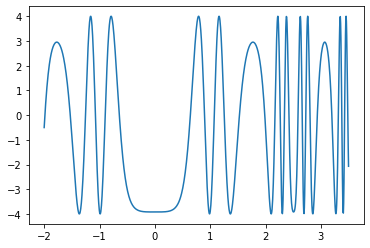

In [14]:
plt.plot(x_nasty,y_nasty)

In [15]:
rand_x_nasty = x_min + (x_max - x_min)*np.random.rand(100000)
rand_y_nasty = f_nasty(rand_x_nasty)

In [16]:
I_nasty_est = (x_max - x_min)*np.mean(rand_y_nasty)

In [17]:
print(I_nasty_est)

-2.791536486776522


Appeal to scipy's quad function to get the 'truth' and find that it is almost the same

In [18]:
integrate.quad(f_nasty,x_min,x_max)

(-2.824748541066965, 5.325798322906062e-09)